In [77]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from help_printing import *
import tensorflow as tf

In [78]:
from Models import build_vae

encoder, decoder, vae = build_vae()
#encoder.summary()
#decoder.summary()
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
encoder (Model)              [(None, 10), (None, 10),  230900    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         228803    
Total params: 459,703
Trainable params: 459,703
Non-trainable params: 0
_________________________________________________________________


In [79]:
checkpoint = tf.train.Checkpoint(step=tf.Variable(1), encoder=encoder, decoder=decoder, vae=vae)

In [80]:
save_dir = 'results_VAE/train_5'
checkpoint.restore(tf.train.latest_checkpoint(save_dir))

In [81]:
data_path = 'data/celeba_split/'
data_list = os.listdir(data_path)
x_data = np.load(data_path+data_list[0])
x_data.shape

(20000, 64, 64, 3)

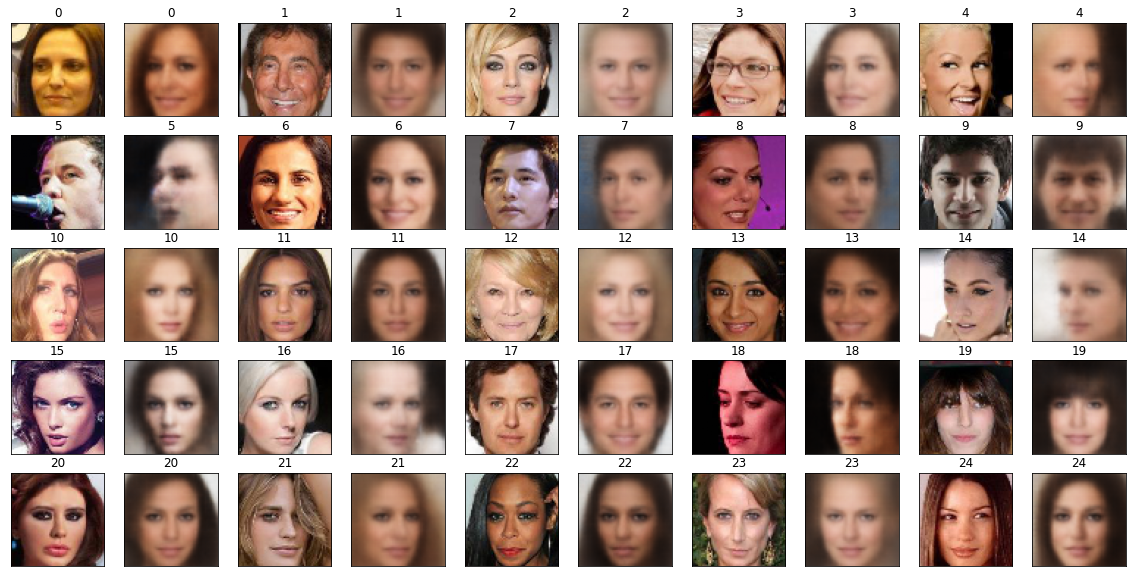

In [84]:
h , w = 5, 10
fig, axes = plt.subplots(h, w, figsize=(w*2, h*2),
                         subplot_kw={'xticks': [], 'yticks': []})
rec_img = vae(x_data[:100])
org_img = x_data[:100]
for ax, i in zip(axes.flat, range(w*h)):
    if i%2 ==0: img = org_img[i//2]
    else: img = rec_img[i//2]
    ax.imshow(img)
    ax.set_title(i//2)
plt.show()

In [169]:
def grid_img(idx, xmin, xmax, zvar):
    fig, ax = plt.subplots(1, 10, figsize=(w*2, h*2),
                             subplot_kw={'xticks': [], 'yticks': []})
    org_img = x_data[idx]
    z = encoder.predict(org_img.reshape(1,64,64,3))[2][0]
    print(z)
    grid_x = np.linspace(xmin, xmax, 10)
    for i in range(10):
        z[zvar] = grid_x[i]
        rec_img = decoder.predict(z.reshape(1,10))
        ax[i].imshow(rec_img.reshape(64,64,3))
        ax[i].set_title('z%i : %f'%(zvar, z[zvar]))
    plt.show()

[ -0.8158346    0.53323853  -3.74312      1.7346445   -1.3476107
   0.9680937   -0.29551834   0.20502715  -3.1525583  -10.180618  ]


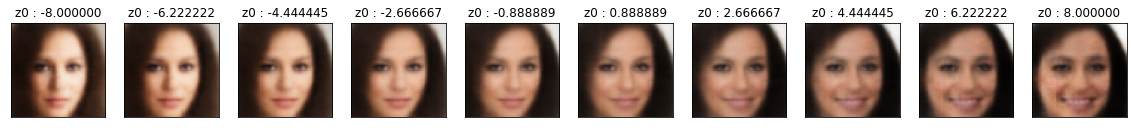

In [203]:
grid_img(20, -8, 8, 0)

[-0.25864732 -0.41195583 -3.470207    0.8793379  -0.7470071  -0.603907
  0.08043909  0.27330834 -3.7718043  -9.564629  ]


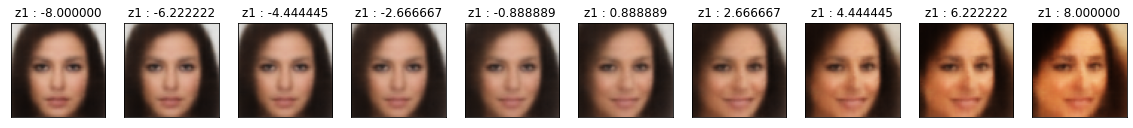

In [204]:
grid_img(20, -8, 8, 1)

[ -0.38292575  -0.16348305  -4.2880087    1.5179644   -0.7644216
  -0.60704935  -0.7638796    0.39897972  -5.5324283  -10.316106  ]


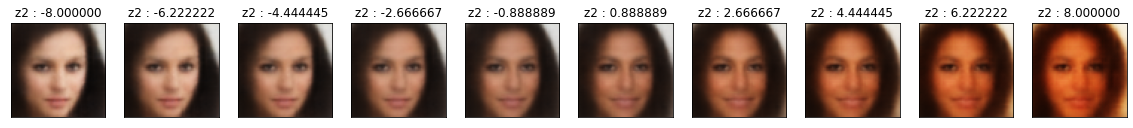

In [205]:
grid_img(20, -8, 8, 2)

[-1.3240997  -0.29057494 -4.0744114   0.7275766  -1.0440727  -1.7177174
 -0.14849493 -0.0897823  -3.6310668  -8.315356  ]


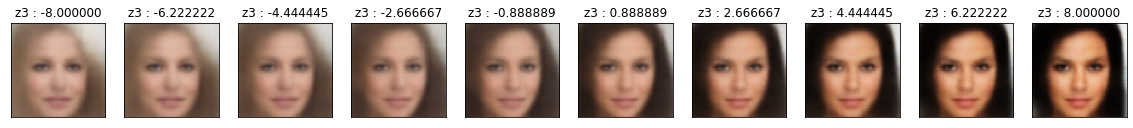

In [206]:
grid_img(20, -8, 8, 3)

[ -1.8339996   -1.7160352   -3.2488048    0.02325571  -1.1814213
  -0.8007487   -0.22451898  -0.51889384  -3.175647   -10.030165  ]


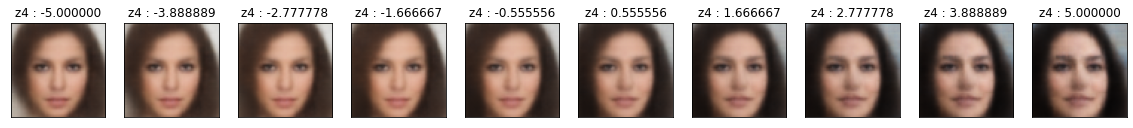

In [208]:
grid_img(20, -5, 5, 4)

[-1.5021923   0.27056158 -3.2795796   0.82242775 -1.071989   -0.47455233
 -0.14863545 -0.4585396  -4.35189    -8.988766  ]


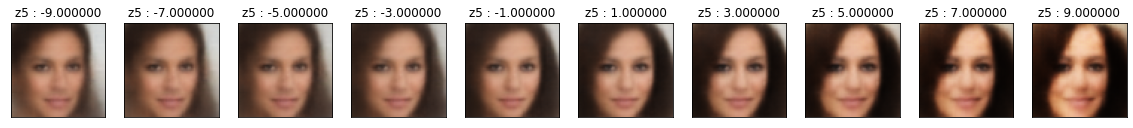

In [217]:
grid_img(20, -9, 9, 5)

[-1.1493862  -0.85880923 -1.9014772   1.0184213  -0.97384554 -1.0227723
  1.0297943   0.25445443 -3.7926877  -9.579764  ]


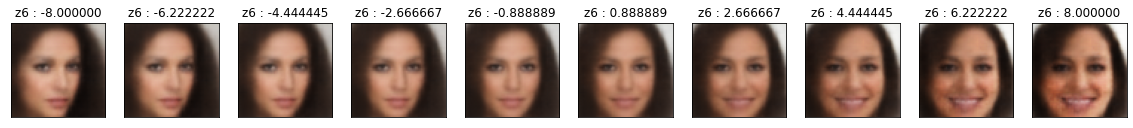

In [211]:
grid_img(20, -8, 8, 6)

[-1.1827773  -1.0056719  -2.8810952   0.631449   -1.6634884  -0.41130924
 -0.64354795 -0.46993506 -4.4925156  -8.576124  ]


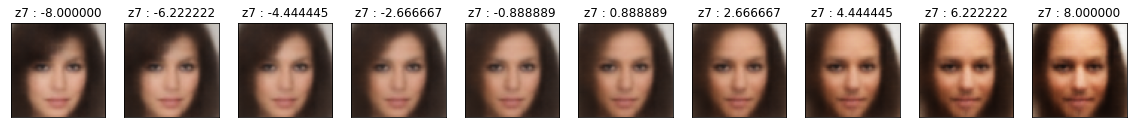

In [212]:
grid_img(20, -8, 8, 7)

[-1.9901867  -0.5259376  -3.31318     1.7696663  -0.5918159  -0.74601877
 -0.5984189  -0.13667801 -4.160107   -9.136538  ]


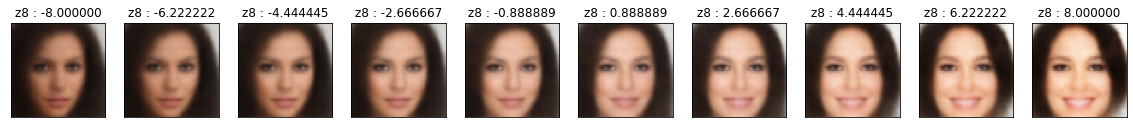

In [213]:
grid_img(20, -8, 8, 8)

[-1.2069438   0.42537308 -4.2046432   1.6300555  -1.5469407   0.20052123
 -1.0437071   0.19178985 -3.777822   -8.427849  ]


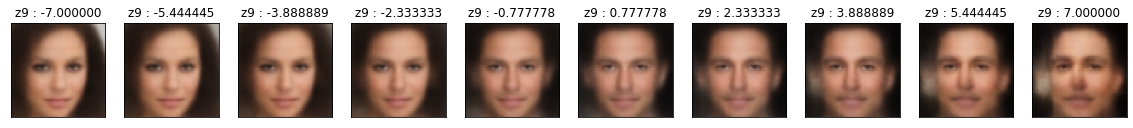

In [215]:
grid_img(20, -7, 7, 9)

[-2.9602654  -7.4622264  -0.1735096  -1.5876774  -3.9680812   1.5938461
  0.85472953  2.1773     -3.5418727  -1.9083021 ]


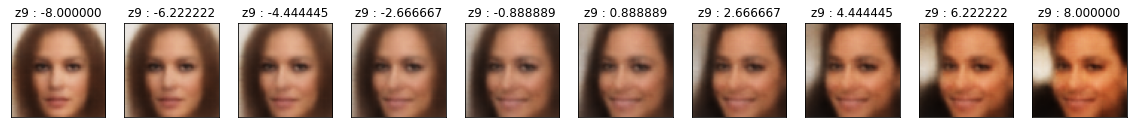

In [232]:
grid_img(0, -8, 8, 9)

[-1.0875976  -2.4818      1.5877057  -0.02008809 -3.4416049  -2.7264614
  0.7392262  -1.2291136  -0.72347623 -2.008253  ]


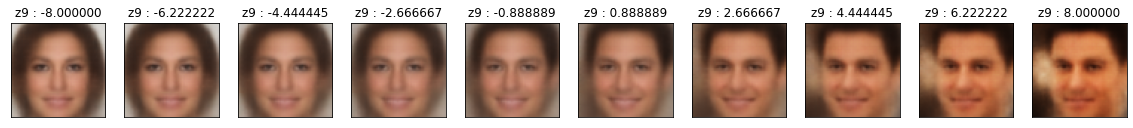

In [231]:
grid_img(1, -8, 8, 9)

[ 0.98831284 -3.3138578  -2.6186743  -5.8445196  -5.139049   -6.3733516
 -3.6441832  -1.1989281   2.9815836  -2.4043722 ]


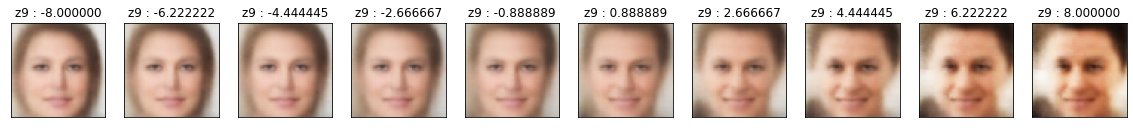

In [230]:
grid_img(2, -8, 8, 9)